# Implement AdaBoost with decision stumps, i.e., 1-level decision trees
In this question, you will implement the AdaBoost algorithm with decision stumps, i.e., 1-level decision trees.
You will need to implement the adaboost algorithm from scratch and train and test the classier on the
dataset provided

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [19]:
# Decision stump h as each weak classifier
# [axis,threshold,polarity,beta] where beta is the weight/contribution of the current weak classifier
class DecisionStump():
    def __init__(self):
        self.polarity = 1
        self.axis = None
        self.threshold = None
        # weak classifier's contribution
        self.beta = None

In [20]:
class AdaBoost:
    def __init__(self, X, y, T):
        # Initialize the model
        # X: data points
        # y: labels
        # T: number of iterations
        # w: weights
        # N: number of training data points

        self.X = X
        self.y = y
        self.T = T
        self.N = X.shape[0]
        
        # initialize weight --> update later for each each iteration
        self.w = np.ones(self.N) / self.N
        
        # record the weak classifiers
        self.clfs = []
        

    def find_next_weak_Learner(self):
        # Find best decision stump
        # Output should define the axis, threshold, polarity and weight of the decision stump
        # You should also update the weights of the data points here

        # TODO
        clf = DecisionStump()
        
        # minimize error over each feature in X for each distincy value --> find proper threshold
        min_error = math.inf
        
        feature_size = self.X.shape[1]
        
        for i in range(feature_size):
            feature_vals = np.expand_dims(self.X[:, i], axis=1)
            unique_column_vals = np.unique(feature_vals)
            for thresh in unique_column_vals:
                polarity = 1
                prediction = np.ones(np.shape(self.y))
                # mark labels of data points who are below threshold as -1
                prediction[self.X[:, i] < thresh] = -1
                # Error = sum of weights of misclassified samples
                error = sum(self.w[self.y != prediction])
                # flip error and polarity in case error is larger than 0.5 --> adjust polarity
                if error > 0.5:
                    error = 1 - error
                    polarity = -1
                if error < min_error:
                    clf.polarity = polarity
                    clf.threshold = thresh
                    clf.axis = i
                    min_error = error
        # compute beta
        clf.beta = (1/2) * math.log((1.0 - min_error) / (min_error + 1e-8)) # in case zero factor
        # compute h_t(x), the prediction using current weak classifier
        hs = np.ones(np.shape(self.y))
        neg_idx = (clf.polarity * self.X[:, clf.axis] < clf.polarity * clf.threshold)
        hs[neg_idx] = -1
        # update sample weights
        self.w *= np.exp(-clf.beta * self.y * hs)
        # normalize sample weight w
        self.w /= np.sum(self.w)
        
        # record the current weak classifier to the classifier list
        self.clfs.append(clf)
                


    def train(self):
        # Train the model for T iterations
        self.clfs = []
        for t in range(self.T):
            # Train weak learner
            # TODO
            self.find_next_weak_Learner()
            
    
    def predict_K(self, X, K):
        # Compute prediction of the model for X using first K weak learners
        # Output should be a vector of labels of length X.shape[0]
        # TODO
        n_samples = np.shape(X)[0]
        y_pred = np.zeros((n_samples, 1))
        # For each classifier => label the samples
        for clf in self.clfs[:K]:
            # compute prediction
            hs = np.ones(np.shape(y_pred))
            neg_idx = (clf.polarity * X[:, clf.axis] < clf.polarity * clf.threshold)
            hs[neg_idx] = -1
            # add weighted prediction 
            y_pred += clf.beta * hs

        # return sign of prediction sum
        y_pred = np.sign(y_pred)

        return y_pred
        

    def accuracy_K(self, X, y, K):
        # Compute accuracy of the model for (X, y) using first K weak learners
        # Output should be a scalar in [0, 1]
        # TODO
        true_count = 0
        y_pred = self.predict_K(X, K)
        for i in range(len(X)):
            if y_pred[i] == y[i]:
                true_count += 1
        return true_count/len(X)

    def scatter_plot(self):
        # Plot the data points and the decision boundary
        # You need not edit this function as long as you have defined the predict_K function properly 
        X = np.asarray([[x_cor, y_cor] for x_cor in np.linspace(np.amin(self.X[:, 0]), np.amax(self.X[:, 0]), 500) for y_cor in np.linspace(np.amin(self.X[:, 1]), np.amax(self.X[:, 1]), 500)])

        fig, ax = plt.subplots(3, 3, figsize=(30, 30))

        for i, K in enumerate([1, 5, 10, 20, 30, 100, 200, 400, 600]):
            # Plot the data points and the decision boundary using k weak learners
            print("Plotting the data points and the decision boundary using {} weak learners".format(K))
            Z_pred = self.predict_K(X, K)

            ax[i // 3, i % 3].scatter(X[:, 0], X[:, 1], c=['white' if z == 1 else 'orange' for z in Z_pred], s=1)
            for numpoint, point in enumerate(self.X):
                ax[i // 3, i % 3].scatter(point[0], point[1], c='black' if self.y[numpoint]==1 else 'red', marker='x' if self.y[numpoint]==1 else 'o')
            ax[i // 3, i % 3].set_title("K = {}".format(K), fontsize=20)
        plt.show()

# Code for Training Routine
### Load Data

In [21]:
#---------------Read the training and testing files
training_data=np.genfromtxt('train_adaboost.csv', delimiter=',')
X_train = training_data[:,0:2]
y_train = training_data[:,2]

testing_data=np.genfromtxt('test_adaboost.csv', delimiter=',')
X_test = testing_data[:,0:2]
y_test = testing_data[:,2]

### Data Visualization

Text(0.5, 1.0, 'Training data')

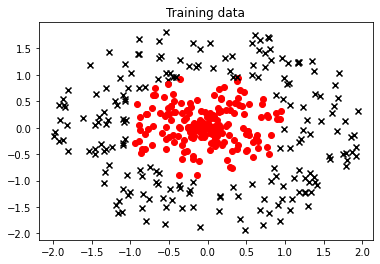

In [22]:
#---------------Plot the training data
fig, ax = plt.subplots()
for numpoint, point in enumerate(X_train):
    ax.scatter(point[0], point[1], c='black' if y_train[numpoint]==1 else 'red', marker='x' if y_train[numpoint]==1 else 'o')
ax.set_title('Training data')

### Start Training

In [23]:
T=600

# Start training
train_adaboost = AdaBoost(X_train, y_train, T)
train_adaboost.train()

### Plot training and testing accuracy

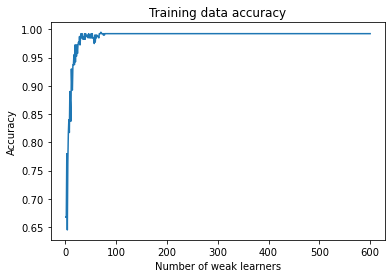

In [24]:
# Plot training data accuracy
accuracy_score = []
for t in range(T):
    accuracy_score.append(train_adaboost.accuracy_K(X_train, y_train, t + 1))
plt.plot(range(1, T + 1), accuracy_score)
plt.xlabel('Number of weak learners')
plt.ylabel('Accuracy')
plt.title('Training data accuracy')
plt.show()

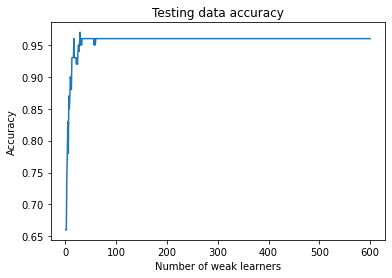

In [25]:
# Plot testing data accuracy
accuracy_score = []
for t in range(T):
    accuracy_score.append(train_adaboost.accuracy_K(X_test, y_test, t + 1))
plt.plot(range(1, T + 1), accuracy_score)
plt.xlabel('Number of weak learners')
plt.ylabel('Accuracy')
plt.title('Testing data accuracy')
plt.show()

### Plot the data points and the decision boundary using k weak learners

In [ ]:
train_adaboost.scatter_plot()

Plotting the data points and the decision boundary using 1 weak learners
Plotting the data points and the decision boundary using 5 weak learners
Plotting the data points and the decision boundary using 10 weak learners
Plotting the data points and the decision boundary using 20 weak learners
Plotting the data points and the decision boundary using 30 weak learners
Plotting the data points and the decision boundary using 100 weak learners
Plotting the data points and the decision boundary using 200 weak learners
Plotting the data points and the decision boundary using 400 weak learners
Plotting the data points and the decision boundary using 600 weak learners
